In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
import numpy as np  # For Linear Algebra
import pandas as pd # Data Processing
import matplotlib.pyplot as plt # Ploting
from scipy import stats
import scipy.stats as statsMM
from scipy.stats import norm ,skew
from scipy.special import boxcox1p
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as linear_model
import seaborn as sns
import warnings
import math

pd.set_option('display.max_columns',10)
pd.set_option('display.max_rows',80)


warnings.filterwarnings('ignore')   # Ignore annoying warning (from sklearn and seaborn)

%matplotlib inline
plt.style.use('ggplot')



In [5]:
# Import Training Data and Test Data
train = pd.read_csv('/Users/rihiko/Desktop/Kaggle/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/Users/rihiko/Desktop/Kaggle/house-prices-advanced-regression-techniques/test.csv')
print(train.shape)
print(test.shape)
print(train.info())
print(train.describe())
print(train.head(5))
print(test.head(5))

(1460, 81)
(1459, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exter

In [6]:
# we can save house Id and drop it from training and test dataset 
Train_Id = train.Id
Test_Id = test.Id
train.drop('Id',axis = 1,inplace  =True)
test.drop('Id',axis = 1,inplace = True)

## Data Processing

## Outlier
### Exploring the relationships between Attributes and SalePrice (View all the relationships between the attribute and 'SalePrice')

In [7]:
attribute = list(train.columns)
attribute.pop(0)
attribute.pop(-1)

ctg_attribute = [attr for attr in attribute if train.dtypes[attr] == 'object']
num_attribute = [attr for attr in attribute if train.dtypes[attr] != 'object']

new_ctg = ['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
           'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YrSold']
ctg_att = ctg_attribute + new_ctg
num_att = [att for att in num_attribute if att not in new_ctg]

'MSSubClass'

'SalePrice'

### Relationship with numerical variables

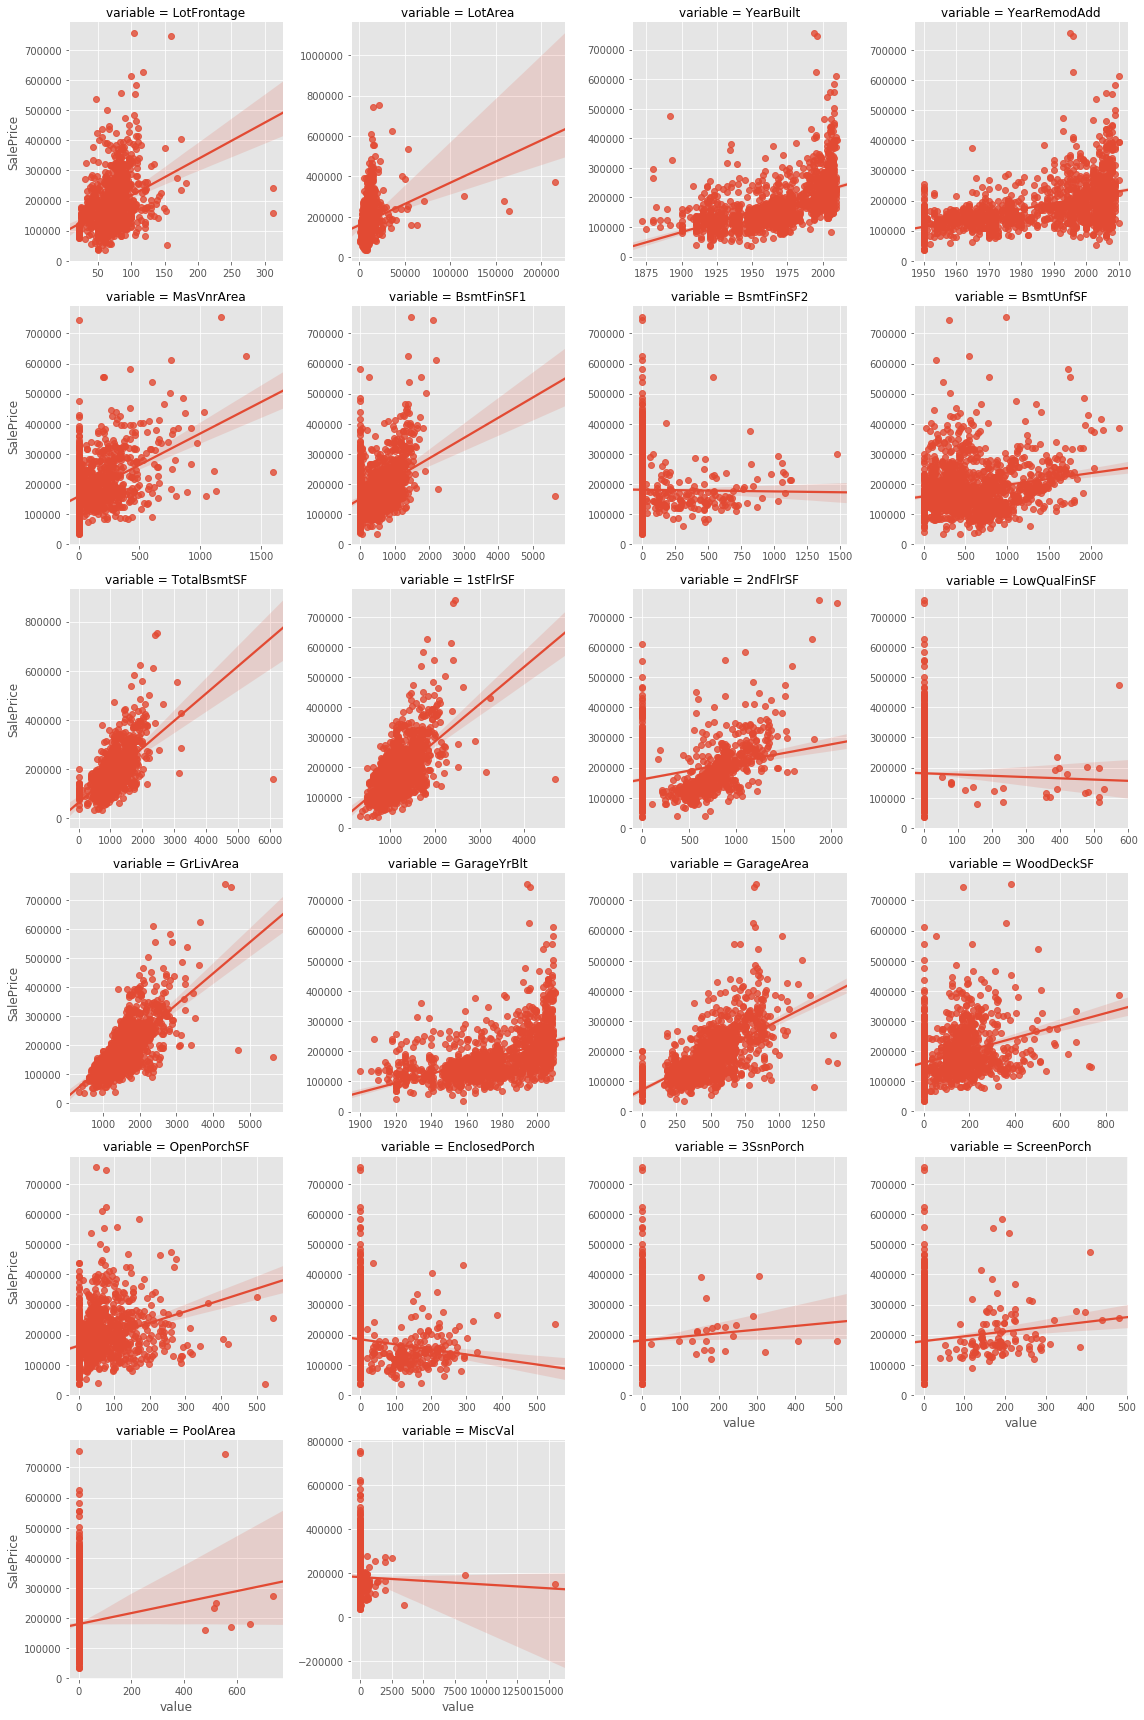

In [8]:
f1 = pd.melt(train,id_vars = ['SalePrice'],value_vars = num_att)
g1 = sns.FacetGrid(f1,col='variable',col_wrap = 4,sharex = False,sharey = False, size= 4)
g1 = g1.map(sns.regplot,'value','SalePrice')
# we can find that there might be some outliers in some scartter plot with high correlations 

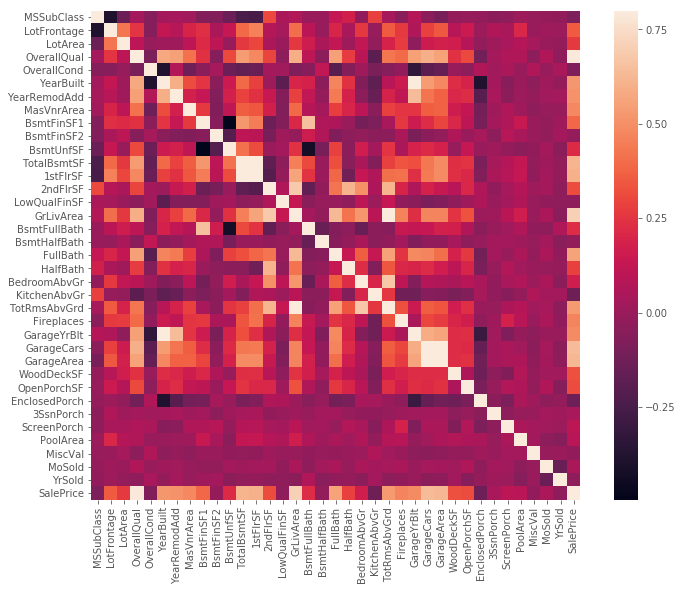

In [9]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [10]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index # the attribute

In [11]:
'''
cm = train[cols].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cm, vmax=.8, square=True)
sns.set(font_scale=1)
hm = sns.heatmap(cm,vmax= 0.8,cbar=True, annot=True,square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
'''

"\ncm = train[cols].corr()\nf, ax = plt.subplots(figsize=(12, 9))\nsns.heatmap(cm, vmax=.8, square=True)\nsns.set(font_scale=1)\nhm = sns.heatmap(cm,vmax= 0.8,cbar=True, annot=True,square=True, fmt='.2f', \n                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)\n"

'SalePrice'

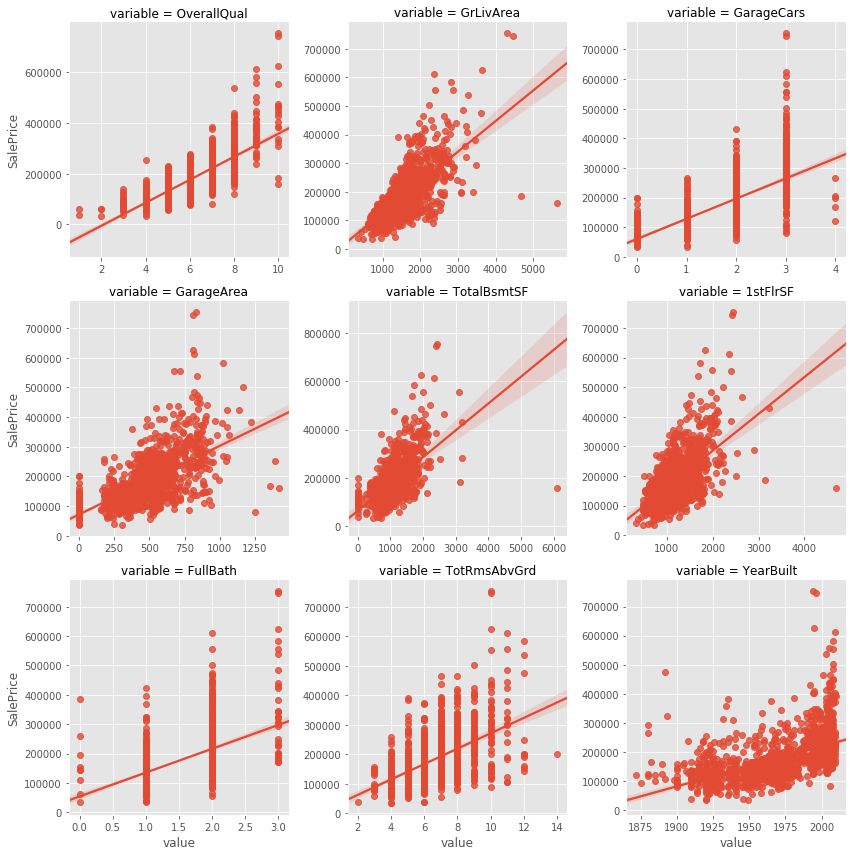

In [12]:
corrAttr = list(cols)
corrAttr.pop(0)
f1 = pd.melt(train,id_vars = ['SalePrice'],value_vars = corrAttr)
g1 = sns.FacetGrid(f1,col='variable',col_wrap = 3,sharex = False,sharey = False, size= 4)
g1 = g1.map(sns.regplot,'value','SalePrice')

#### GrLivArea

Text(0, 0.5, 'SalePrice')

Text(0.5, 0, 'GrLivArea')

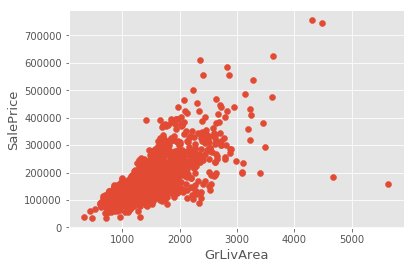

In [13]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()  

In [14]:
#Deleting 2 outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

Text(0, 0.5, 'SalePrice')

Text(0.5, 0, 'GrLivArea')

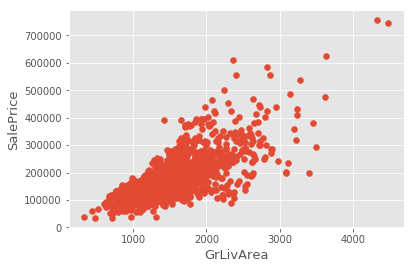

In [15]:
#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

#### TotalBsmtSF

Text(0, 0.5, 'SalePrice')

Text(0.5, 0, 'TotalBsmtSF')

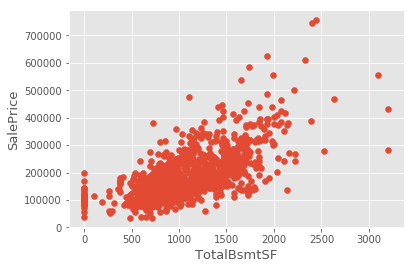

In [16]:
#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['TotalBsmtSF'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()    # better than before, and we do not need to delete 

#### 1stFlrSF

Text(0, 0.5, 'SalePrice')

Text(0.5, 0, '1stFlrSF')

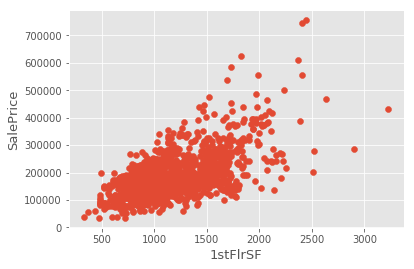

In [17]:
# Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['1stFlrSF'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('1stFlrSF', fontsize=13)
plt.show()    # better than before, and we do not need to delete 

> Note : Outliers removal is note always safe. 
We decided to delete these two as they are very huge and really bad ( extremely large areas for very low prices).

### Responce Variable

In [18]:
# SalePrice  房价
print(train['SalePrice'].describe())   
print(train['SalePrice'].isnull().sum())    # no missing data

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
0


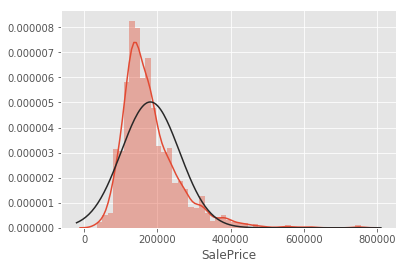

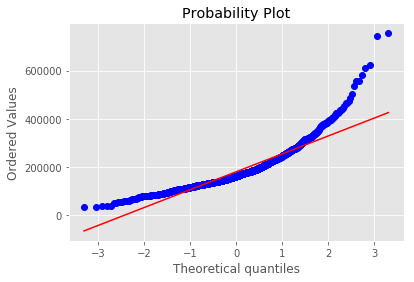

In [19]:
# distribution plot
sns.distplot(train.SalePrice, fit = norm) # not fit the normal distribution
# Q-Q plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [20]:
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt()) # as the graph and data shown, SalePrice is skew

Skewness: 1.881296
Kurtosis: 6.523067


#### transform the target variable into normal distribution

> 1. 通常对于y进行log变换，因为诸如线性模型、SVM等要求target variable是服从正态分布的  
> 2. 对于特征值服从偏态分布的，可以使用box-cox进行变换，可使用

In [21]:
train['SalePrice'] = np.log1p(train['SalePrice'])

Skewness: 0.121580
Kurtosis: 0.804751


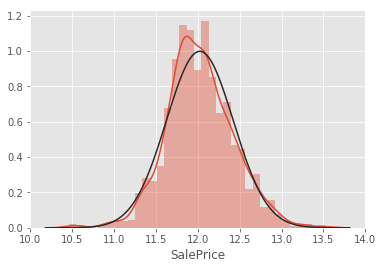

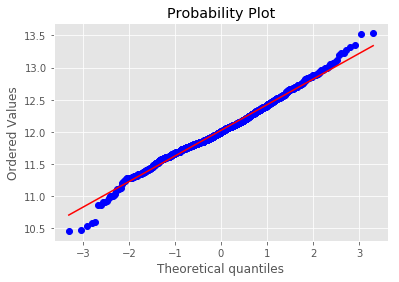

In [22]:
sns.distplot(train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
print("Skewness: %f" % train['SalePrice'].skew()) #Skewness: 0.121580
print("Kurtosis: %f" % train['SalePrice'].kurt()) #Kurtosis: 0.804751

## Features engineering 

> 处理特征的方法
1. 查看每个特征的构成
2. 填补缺失 
3. 查看每个特征的分布 
4. 偏态正态化 
5. 构造新特征 
6. 删除不需要特征 
7. 删除异常值

### missing data

In [23]:
# we have training data and test data ID,those are train_Id and test_Id
ntrain = train.shape[0]
ntest = test.shape[0]
train_y = train.SalePrice.values


In [24]:
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print(all_data.shape)   # (2917, 79)

(2917, 79)


In [25]:
aa = all_data.isnull().sum()
aa[aa>0].sort_values(ascending=False)

PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageCond       159
GarageFinish     159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Electrical         1
BsmtUnfSF          1
Exterior1st        1
Exterior2nd        1
TotalBsmtSF        1
GarageArea         1
GarageCars         1
BsmtFinSF2         1
BsmtFinSF1         1
KitchenQual        1
SaleType           1
dtype: int64

> Some houses do not have Pool (therefore no PoolQC):2908, No garage:159/157, no alley:2719
no fence: 2346, no basement: 79, no basement type 2: 1, electrical : 电路系统，
No masVnr 装修石材:24 area:23
MSZoning:4  BsmtFullBath: 2, BsmtHalfBath: 2 ,Utilities: 2;Functional :2
Electrical, BsmtUnfSF ,Exterior1st ,Exterior2nd ,TotalBsmtSF ,GarageArea
GarageCars  BsmtFinSF2  ,BsmtFinSF1  ,KitchenQual  ,SaleType

In [26]:
bb = aa/(ntrain + ntest)
bb[bb>0].sort_values(ascending=False)
# fill none PoolQC MiscFeature Alley Fence FireplaceQu 
# because some house might not have Pool, Misc Feature, Alley, Fence, FirePlace and LotFrontage
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

PoolQC          0.996915
MiscFeature     0.964004
Alley           0.932122
Fence           0.804251
FireplaceQu     0.486802
LotFrontage     0.166610
GarageQual      0.054508
GarageCond      0.054508
GarageFinish    0.054508
GarageYrBlt     0.054508
GarageType      0.053822
BsmtExposure    0.028111
BsmtCond        0.028111
BsmtQual        0.027768
BsmtFinType2    0.027425
BsmtFinType1    0.027083
MasVnrType      0.008228
MasVnrArea      0.007885
MSZoning        0.001371
BsmtFullBath    0.000686
BsmtHalfBath    0.000686
Utilities       0.000686
Functional      0.000686
Electrical      0.000343
BsmtUnfSF       0.000343
Exterior1st     0.000343
Exterior2nd     0.000343
TotalBsmtSF     0.000343
GarageArea      0.000343
GarageCars      0.000343
BsmtFinSF2      0.000343
BsmtFinSF1      0.000343
KitchenQual     0.000343
SaleType        0.000343
dtype: float64

In [27]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [28]:
# Garage
garage_aa = all_data[all_data.columns[all_data.columns.str.contains('Garage')]].isnull().sum()
garage_aa[garage_aa>0].sort_values(ascending=False)

GarageYrBlt     159
GarageQual      159
GarageFinish    159
GarageCond      159
GarageType      157
GarageCars        1
GarageArea        1
dtype: int64

In [29]:
tup_1 = all_data[(all_data.GarageArea.isnull()) & (all_data.GarageCars.isnull())]
tup_1[all_data.columns[all_data.columns.str.contains('Garage')]]
# therefore, 这个唯一缺失值存在与test dataset里面， 只有GarageType, 这个可能是错误的值...No Garage
# all_data.replace[(all_data.GarageArea.isnull()) & (all_data.GarageCars.isnull())].GarageType = 'NaN'
all_data.iloc[2574,36] = 'None'
# 此时这个tup_1 被修改成 ‘NaN’ 这个String 表示No Garage

,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt
2574,NaN,NaN,NaN,NaN,NaN,Detchd,NaN


In [30]:
'''
all_data[(all_data.GarageFinish.isnull()) & (all_data.GarageType.notnull())].GarageType
# 可以发现 2124 这个值也有问题 
all_data.iloc[2124][all_data.columns[all_data.columns.str.contains('Garage')]]
# 但这个有GarageArea GarageCars， 所以我们可以填充 GarageCond GarageFinish GarageQual   GarageYrBlt        

all_data.GarageCond[all_data.GarageCars == 1].value_counts()  # most of them are 'TA', therefore we replace the value as 'TA'
all_data.GarageFinish[all_data.GarageCars == 1].value_counts() # most of them are 'Unf', therefore we replace the value as 'Unf'
all_data.GarageQual[all_data.GarageCars == 1].value_counts()  # most of them are 'TA', therefore we replace the value as 'TA'
all_data.GarageYrBlt[all_data.GarageCars == 1].describe() 
all_data.iloc[2124][all_data.columns[all_data.columns.str.contains('Year')]] #  YearBuilt = 1910
all_data.GarageYrBlt[all_data.GarageCars == 1].describe() #  we can fill the blank as 1956, which is medium value of GarageYrBlt   
'''

"\nall_data[(all_data.GarageFinish.isnull()) & (all_data.GarageType.notnull())].GarageType\n# 可以发现 2124 这个值也有问题 \nall_data.iloc[2124][all_data.columns[all_data.columns.str.contains('Garage')]]\n# 但这个有GarageArea GarageCars， 所以我们可以填充 GarageCond GarageFinish GarageQual   GarageYrBlt        \n\nall_data.GarageCond[all_data.GarageCars == 1].value_counts()  # most of them are 'TA', therefore we replace the value as 'TA'\nall_data.GarageFinish[all_data.GarageCars == 1].value_counts() # most of them are 'Unf', therefore we replace the value as 'Unf'\nall_data.GarageQual[all_data.GarageCars == 1].value_counts()  # most of them are 'TA', therefore we replace the value as 'TA'\nall_data.GarageYrBlt[all_data.GarageCars == 1].describe() \nall_data.iloc[2124][all_data.columns[all_data.columns.str.contains('Year')]] #  YearBuilt = 1910\nall_data.GarageYrBlt[all_data.GarageCars == 1].describe() #  we can fill the blank as 1956, which is medium value of GarageYrBlt   \n"

In [31]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)


In [32]:
garage_aa = all_data[all_data.columns[all_data.columns.str.contains('Garage')]].isnull().sum()
garage_aa
# NO missing data in garage

GarageArea      0
GarageCars      0
GarageCond      0
GarageFinish    0
GarageQual      0
GarageType      0
GarageYrBlt     0
dtype: int64

In [33]:
print(all_data['GarageYrBlt'].describe())  # mean value is close to medium value
print(all_data['GarageQual'].describe())  # categorial
print(all_data['GarageFinish'].describe())  # categorial
print(all_data['GarageCond'].describe())  # categorial
print(all_data['GarageType'].describe())  # categorial
print(all_data['GarageCars'].describe())  # categorial
print(all_data['GarageArea'].describe())  # mean value is close to medium value

print(all_data['GarageYrBlt'].value_counts())  # mean value is close to medium value
print(all_data['GarageQual'].value_counts())  # categorial
print(all_data['GarageFinish'].value_counts())  # categorial
print(all_data['GarageCond'].value_counts())  # categorial
print(all_data['GarageType'].value_counts())  # categorial
print(all_data['GarageCars'].value_counts())  # categorial

print(all_data['GarageArea'].value_counts())  # mean value is close to medium value

count    2917.000000
mean     1870.270141
std       449.826161
min         0.000000
25%      1957.000000
50%      1977.000000
75%      2001.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64
count     2917
unique       6
top         TA
freq      2602
Name: GarageQual, dtype: object
count     2917
unique       4
top        Unf
freq      1230
Name: GarageFinish, dtype: object
count     2917
unique       6
top         TA
freq      2652
Name: GarageCond, dtype: object
count       2917
unique         7
top       Attchd
freq        1722
Name: GarageType, dtype: object
count    2917.000000
mean        1.765513
std         0.762102
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64
count    2917.000000
mean      472.247515
std       214.762268
min         0.000000
25%       320.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64
0.0       159
2005

In [34]:
# Bsmt
Bsmt_aa = all_data[all_data.columns[all_data.columns.str.contains('Bsmt')]].isnull().sum()
Bsmt_aa[Bsmt_aa>0].sort_values(ascending=False)


all_data.loc[all_data.BsmtCond.isnull()][all_data.columns[all_data.columns.str.contains('Bsmt')]]
all_data.loc[all_data.BsmtExposure.isnull()].BsmtCond.value_counts()


for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

BsmtExposure    82
BsmtCond        82
BsmtQual        81
BsmtFinType2    80
BsmtFinType1    79
BsmtHalfBath     2
BsmtFullBath     2
TotalBsmtSF      1
BsmtUnfSF        1
BsmtFinSF2       1
BsmtFinSF1       1
dtype: int64

,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,TotalBsmtSF
17,NaN,NaN,0.0,0.0,NaN,...,0.0,0.0,NaN,0.0,0.0
39,NaN,NaN,0.0,0.0,NaN,...,0.0,0.0,NaN,0.0,0.0
90,NaN,NaN,0.0,0.0,NaN,...,0.0,0.0,NaN,0.0,0.0
102,NaN,NaN,0.0,0.0,NaN,...,0.0,0.0,NaN,0.0,0.0
156,NaN,NaN,0.0,0.0,NaN,...,0.0,0.0,NaN,0.0,0.0
182,NaN,NaN,0.0,0.0,NaN,...,0.0,0.0,NaN,0.0,0.0
259,NaN,NaN,0.0,0.0,NaN,...,0.0,0.0,NaN,0.0,0.0
342,NaN,NaN,0.0,0.0,NaN,...,0.0,0.0,NaN,0.0,0.0
362,NaN,NaN,0.0,0.0,NaN,...,0.0,0.0,NaN,0.0,0.0
371,NaN,NaN,0.0,0.0,NaN,...,0.0,0.0,NaN,0.0,0.0


TA    3
Name: BsmtCond, dtype: int64

In [35]:
# MasVnrType
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)


In [36]:
# Others
print(all_data['MSZoning'].value_counts())  #  mode is 'RL'
print(all_data['Utilities'].value_counts())  # mode is 'AllPub'
all_data.drop('Utilities',axis = 1,inplace = True)  # only 1 NoSewa, therefore, Utilities might not be significant fro the responce variables
print(all_data['Functional'].value_counts())  # 'Typ'
print(all_data['SaleType'].value_counts())   # WD
print(all_data['KitchenQual'].value_counts())   #TA
print(all_data['Exterior2nd'].value_counts())  
print(all_data['Exterior1st'].value_counts())  
print(all_data['Electrical'].value_counts())  # SBrk

RL         2263
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64
Typ     2715
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64
WD       2525
New       237
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64
TA    1492
Gd    1151
Ex     203
Fa      70
Name: KitchenQual, dtype: int64
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     125
Wd Shng      81
BrkFace      47
Stucco       46
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     125
BrkFace      87
WdShing      56
AsbShng      44
Stucco       42
BrkComm       6
AsphShn       

In [37]:
aa = all_data.isnull().sum()
other_miss = list(aa[aa>0].sort_values(ascending=False).index)

In [38]:
for col in (other_miss):
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])
# No missing data!!!!!

In [39]:
# Transform datatype
attribute = list(all_data.columns)

ctg_attribute = [attr for attr in attribute if all_data.dtypes[attr] == 'object']
num_attribute = [attr for attr in attribute if all_data.dtypes[attr] != 'object']

new_ctg = ['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
           'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YrSold']

ctg_att = ctg_attribute + new_ctg
num_att = [att for att in num_attribute if att not in new_ctg]

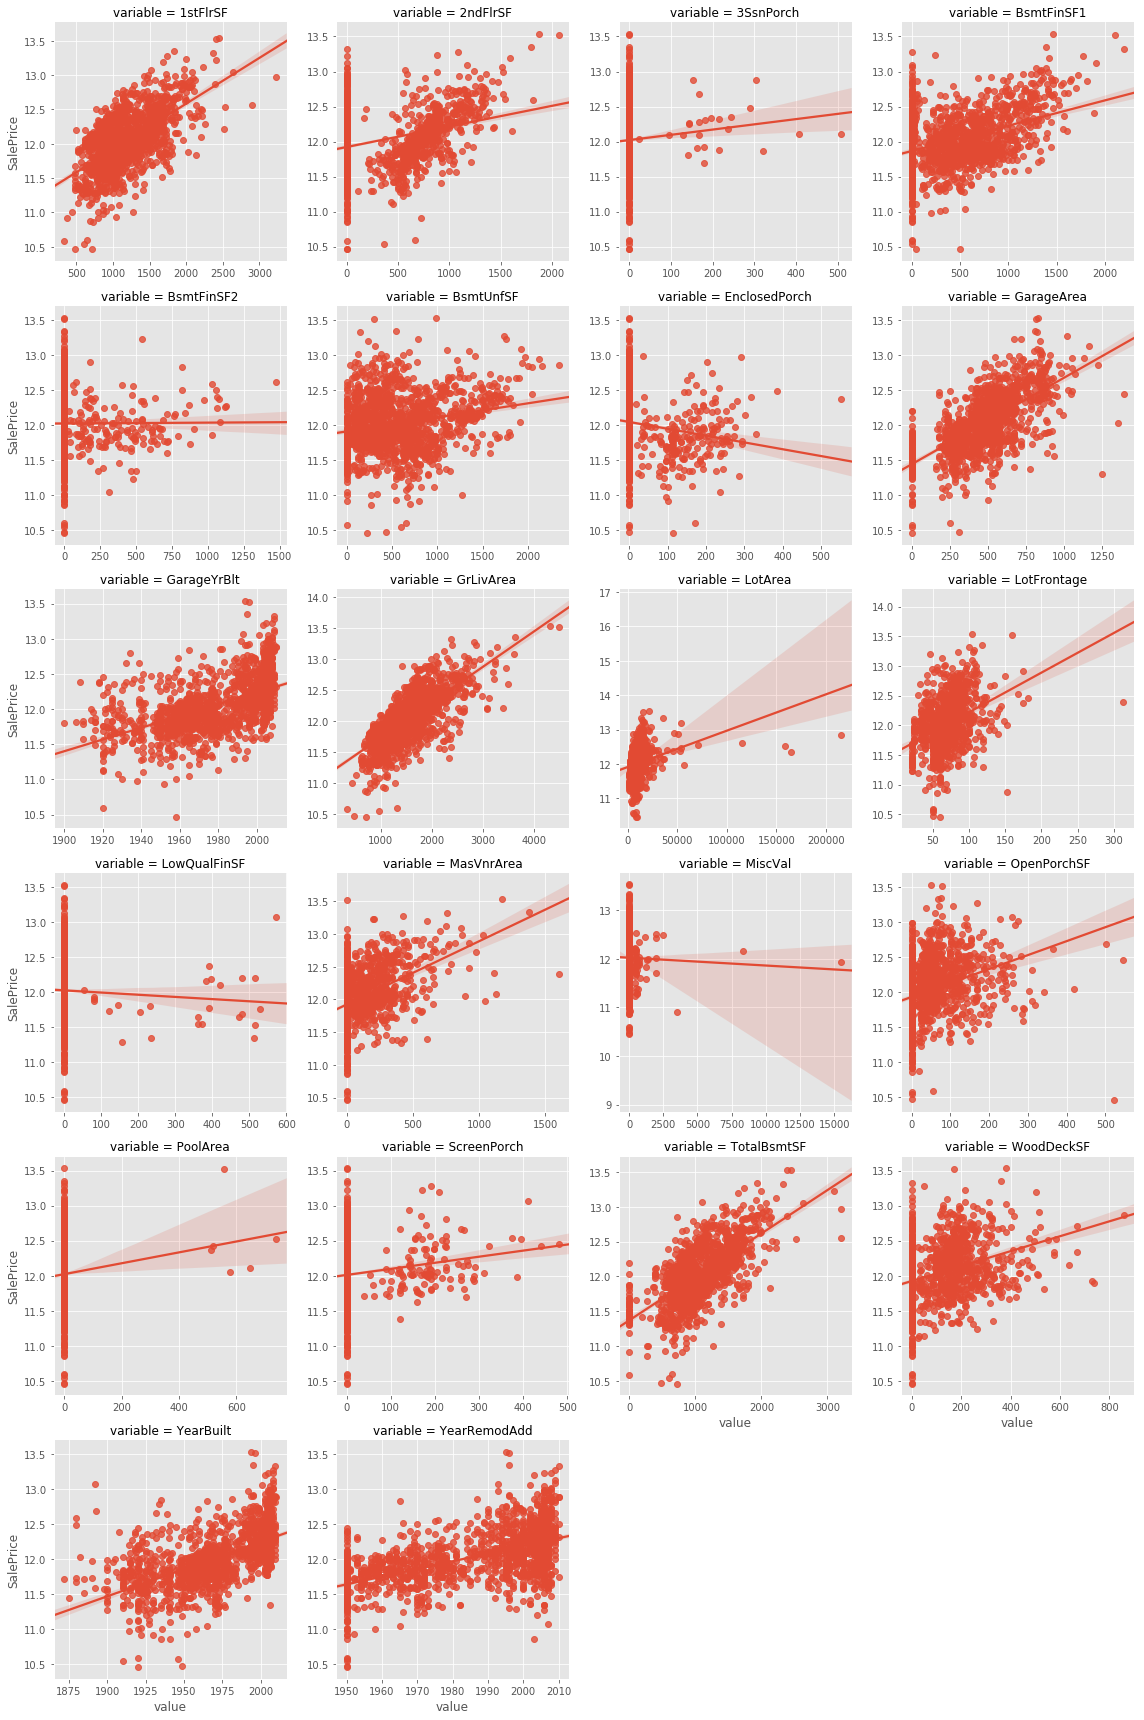

In [40]:
# Relationship with numerical variables
f1 = pd.melt(train,id_vars = ['SalePrice'],value_vars = num_att)
g1 = sns.FacetGrid(f1,col='variable',col_wrap = 4,sharex = False,sharey = False, size= 4)
g1 = g1.map(sns.regplot,'value','SalePrice')

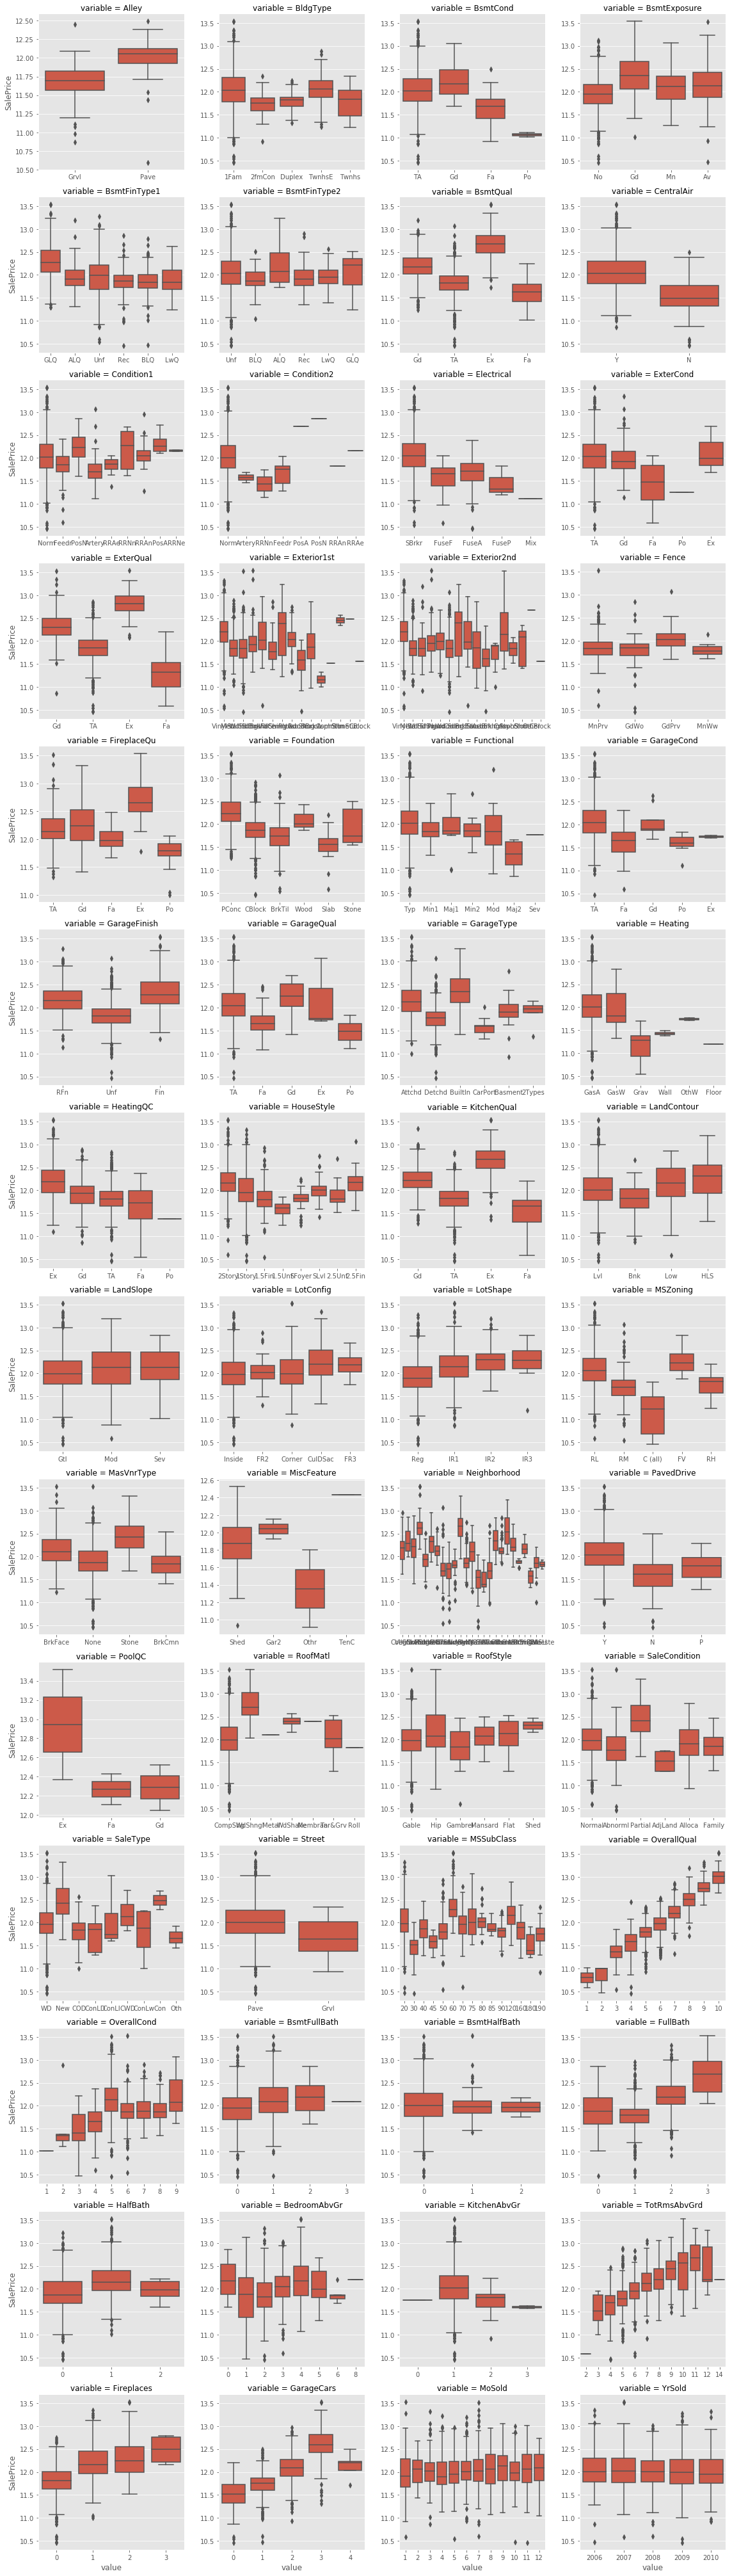

In [41]:
# Relationship with categorical features
    #box plot overallqual/saleprice
f2 = pd.melt(train,id_vars = ['SalePrice'],value_vars = ctg_att)
g2 = sns.FacetGrid(f2,col = 'variable',col_wrap = 4,sharex = False,sharey = False,size = 4)
g2 = g2.map(sns.boxplot,'value','SalePrice')

In [42]:
for col in ctg_att:
    all_data[col] = all_data[col].astype(str)

In [43]:
all_data['YearRemodAdd'] = all_data['YearRemodAdd'].astype(float)

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 78 columns):
1stFlrSF         2917 non-null int64
2ndFlrSF         2917 non-null int64
3SsnPorch        2917 non-null int64
Alley            2917 non-null object
BedroomAbvGr     2917 non-null object
BldgType         2917 non-null object
BsmtCond         2917 non-null object
BsmtExposure     2917 non-null object
BsmtFinSF1       2917 non-null float64
BsmtFinSF2       2917 non-null float64
BsmtFinType1     2917 non-null object
BsmtFinType2     2917 non-null object
BsmtFullBath     2917 non-null object
BsmtHalfBath     2917 non-null object
BsmtQual         2917 non-null object
BsmtUnfSF        2917 non-null float64
CentralAir       2917 non-null object
Condition1       2917 non-null object
Condition2       2917 non-null object
Electrical       2917 non-null object
EnclosedPorch    2917 non-null int64
ExterCond        2917 non-null object
ExterQual        2917 non-null object
Exterior1st      291

In [46]:
# New Feature

# 1 new feature: Total Area

'''
traindt = train
traindt['totalArea_1'] = traindt['GrLivArea'] + traindt['GarageArea'] + traindt['TotalBsmtSF']
traindt['totalArea_liv'] = traindt['GarageArea'] + traindt['TotalBsmtSF']
traindt['totalArea_grg'] = traindt['GrLivArea'] + traindt['TotalBsmtSF']
traindt['totalArea_bsm'] = traindt['GrLivArea'] + traindt['GarageArea']

corrAttr = ['SalePrice','totalArea_1','totalArea_grg','totalArea_liv','totalArea_bsm','GrLivArea','GarageArea','TotalBsmtSF']

corrmat = traindt[corrAttr].corr()


f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
sns.set(font_scale=1)
hm = sns.heatmap(corrmat,vmax= 0.8,cbar=True, annot=True,square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=corrAttr, xticklabels=corrAttr)


# therefore, we add totalArea as the new feature
'''

all_data['totalArea'] = all_data['GrLivArea'] + all_data['GarageArea'] + all_data['TotalBsmtSF']

"\ntraindt = train\ntraindt['totalArea_1'] = traindt['GrLivArea'] + traindt['GarageArea'] + traindt['TotalBsmtSF']\ntraindt['totalArea_liv'] = traindt['GarageArea'] + traindt['TotalBsmtSF']\ntraindt['totalArea_grg'] = traindt['GrLivArea'] + traindt['TotalBsmtSF']\ntraindt['totalArea_bsm'] = traindt['GrLivArea'] + traindt['GarageArea']\n\ncorrAttr = ['SalePrice','totalArea_1','totalArea_grg','totalArea_liv','totalArea_bsm','GrLivArea','GarageArea','TotalBsmtSF']\n\ncorrmat = traindt[corrAttr].corr()\n\n\nf, ax = plt.subplots(figsize=(12, 9))\nsns.heatmap(corrmat, vmax=.8, square=True)\nsns.set(font_scale=1)\nhm = sns.heatmap(corrmat,vmax= 0.8,cbar=True, annot=True,square=True, fmt='.2f', \n                 annot_kws={'size': 10}, yticklabels=corrAttr, xticklabels=corrAttr)\n\n\n# therefore, we add totalArea as the new feature\n"

"\n# 3 Correation between variables: if correlation is strong, there might be multicollinearity\n# and we also can find that the correlation between single attribute and response \n#correlation matrix\ntraindt.drop(['totalArea_liv','totalArea_grg','totalArea_bsm','totalArea_2','totalArea_3'],axis = 1,inplace = True)\n\ncorrmat = traindt.corr()\nf, ax = plt.subplots(figsize=(12, 9))\nsns.heatmap(corrmat, vmax=.8, square=True)\n\n\nk = 20 #number of variables for heatmap\ncols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index\ncm = traindt[cols].corr()\nf, ax = plt.subplots(figsize=(12, 9))\n\nsns.set(font_scale=1)\nhm = sns.heatmap(cm,vmax= 0.8,cbar=True, annot=True,square=True, fmt='.2f', \n                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)\n\n# As shown in the hm heatmap, we can found that 'GarageArea' and 'GarageCar', '1stFlrSF' and 'TotalBsmtSF'\n#               'TotRmsAbvGrd' and 'GrLivArea', 'GarageYrBlt' and 'YearBuilt' are highly corre

In [57]:
"""
# 3 Correation between variables: if correlation is strong, there might be multicollinearity
# and we also can find that the correlation between single attribute and response 
#correlation matrix
traindt.drop(['totalArea_liv','totalArea_grg','totalArea_bsm','totalArea_2','totalArea_3'],axis = 1,inplace = True)

corrmat = traindt.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)


k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = traindt[cols].corr()
f, ax = plt.subplots(figsize=(12, 9))

sns.set(font_scale=1)
hm = sns.heatmap(cm,vmax= 0.8,cbar=True, annot=True,square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

# As shown in the hm heatmap, we can found that 'GarageArea' and 'GarageCar', '1stFlrSF' and 'TotalBsmtSF'
#               'TotRmsAbvGrd' and 'GrLivArea', 'GarageYrBlt' and 'YearBuilt' are highly correlated
#               Therefore, we may eliminate one of factor
"""

"\n# 3 Correation between variables: if correlation is strong, there might be multicollinearity\n# and we also can find that the correlation between single attribute and response \n#correlation matrix\ntraindt.drop(['totalArea_liv','totalArea_grg','totalArea_bsm','totalArea_2','totalArea_3'],axis = 1,inplace = True)\n\ncorrmat = traindt.corr()\nf, ax = plt.subplots(figsize=(12, 9))\nsns.heatmap(corrmat, vmax=.8, square=True)\n\n\nk = 20 #number of variables for heatmap\ncols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index\ncm = traindt[cols].corr()\nf, ax = plt.subplots(figsize=(12, 9))\n\nsns.set(font_scale=1)\nhm = sns.heatmap(cm,vmax= 0.8,cbar=True, annot=True,square=True, fmt='.2f', \n                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)\n\n# As shown in the hm heatmap, we can found that 'GarageArea' and 'GarageCar', '1stFlrSF' and 'TotalBsmtSF'\n#               'TotRmsAbvGrd' and 'GrLivArea', 'GarageYrBlt' and 'YearBuilt' are highly corre

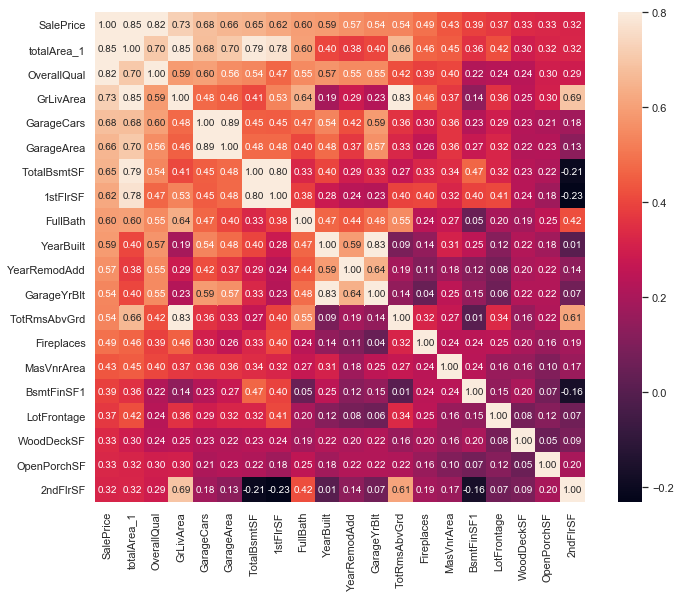

In [58]:

k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = traindt[cols].corr()
f, ax = plt.subplots(figsize=(12, 9))

sns.set(font_scale=1)
hm = sns.heatmap(cm,vmax= 0.8,cbar=True, annot=True,square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)


In [59]:
train.drop('GarageArea',axis = 1,inplace = True)
train.drop('1stFlrSF',axis = 1,inplace = True)
train.drop('GarageYrBlt',axis = 1,inplace = True)
train.drop('TotRmsAbvGrd',axis = 1,inplace = True)

In [62]:
num_att = num_att + ['totalArea']


In [63]:

skew = list()
for attr in num_att:
    skewness = all_data[attr].skew()
    skew.append(skewness)
skewness = pd.Series(skew)
skewness.index = num_att

skewness = skewness[abs(skewness) > 0.75]
skewness.sort_values(ascending = False)

skewed_features = skewness.index

MiscVal          21.950962
PoolArea         17.697766
LotArea          13.116240
LowQualFinSF     12.090757
3SsnPorch        11.377932
BsmtFinSF2        4.146636
EnclosedPorch     4.004404
ScreenPorch       3.947131
MasVnrArea        2.623068
OpenPorchSF       2.530660
WoodDeckSF        1.845741
1stFlrSF          1.257933
LotFrontage       1.103606
GrLivArea         1.069300
BsmtFinSF1        0.981149
BsmtUnfSF         0.920161
totalArea         0.892101
2ndFlrSF          0.861999
GarageYrBlt      -3.906642
dtype: float64

In [70]:
all_data[skewed_features] = np.log1p(all_data[skewed_features])

In [77]:
test[skewed_features]

KeyError: "Index(['totalArea'], dtype='object') not in index"